In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import cv2

In [2]:
h2 = (1/16)*np.array([1,4,6,4,1])
print(h2)

[0.0625 0.25   0.375  0.25   0.0625]


In [3]:
butterfly = imageio.imread('http://www.ic.unicamp.br/~helio/imagens_png/butterfly.png')
print(butterfly.shape)
print(np.min(butterfly), np.max(butterfly))

(512, 512)
92 234


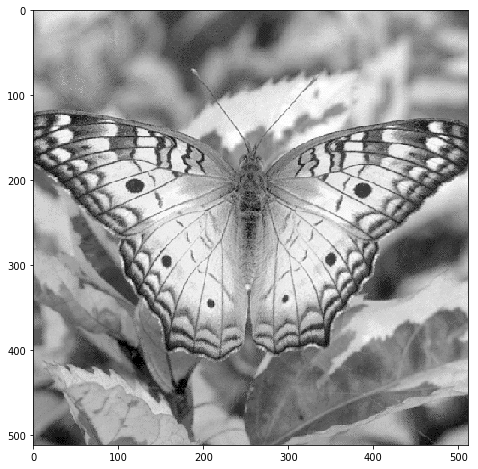

In [4]:
plt.figure(figsize = (20,8))
plt.imshow(butterfly,cmap='gray')
plt.show()

In [5]:
def conv2d(image, k1, k2):
    horizontal_conv = []
    for row in image.T:
#         print("row:",row)
        value = np.convolve(row, k1, mode='same')
        horizontal_conv.append(value)
#         print("horizontal_conv:",horizontal_conv)
    horizontal_conv = np.asarray(horizontal_conv)
    vertical_conv = []
    for row in horizontal_conv.T:
        value = np.convolve(row, k2, mode='same')
        vertical_conv.append(value)

    return np.asarray(vertical_conv)

In [6]:
kernel = np.array([1,2,1])

image = np.array([[10,20,30],
                [40,50,60],
                [70,80,90]])
# image = np.pad(image, (1,1), 'constant', constant_values=0)
print(image)

res = conv2d(image, kernel, kernel)
print(res)

[[10 20 30]
 [40 50 60]
 [70 80 90]]
[[210 360 330]
 [520 800 680]
 [570 840 690]]


In [7]:
res = conv2d(butterfly, h2, h2)
print(res.shape)
print(np.min(res), np.max(res))

(512, 512)
61.8046875 233.84375


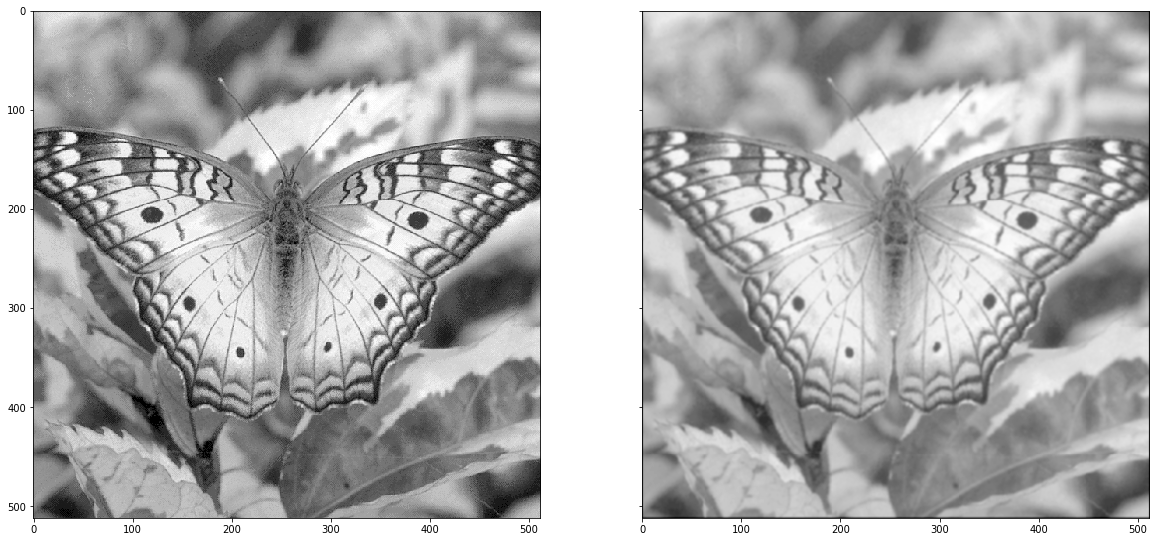

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(20,10))
ax1.imshow(butterfly, cmap='gray')
ax2.imshow(res, cmap='gray')
plt.show()

In [9]:
h3 = np.array([[-1, 0, 1],
               [-2, 0, 2],
               [-1, 0, 1]])  / 4.0

h4 = h3.T

In [10]:
# h3[0,:]
h3[:,2]

array([0.25, 0.5 , 0.25])

In [11]:
print(h3)
print(h4)

[[-0.25  0.    0.25]
 [-0.5   0.    0.5 ]
 [-0.25  0.    0.25]]
[[-0.25 -0.5  -0.25]
 [ 0.    0.    0.  ]
 [ 0.25  0.5   0.25]]


In [35]:
Dx = conv2d(butterfly, [-1,0,1], [1,2,1])
Dy = conv2d(butterfly, [1,2,1], [-1,0,1])

# Dx = dst = cv2.filter2D(butterfly,ddepth=cv2.CV_8U,kernel=h3)
# Dy = dst = cv2.filter2D(butterfly,ddepth=cv2.CV_8U,kernel=h4)

print(Dx.shape)
print(np.min(Dx), np.max(Dy))

(512, 512)
-892 914


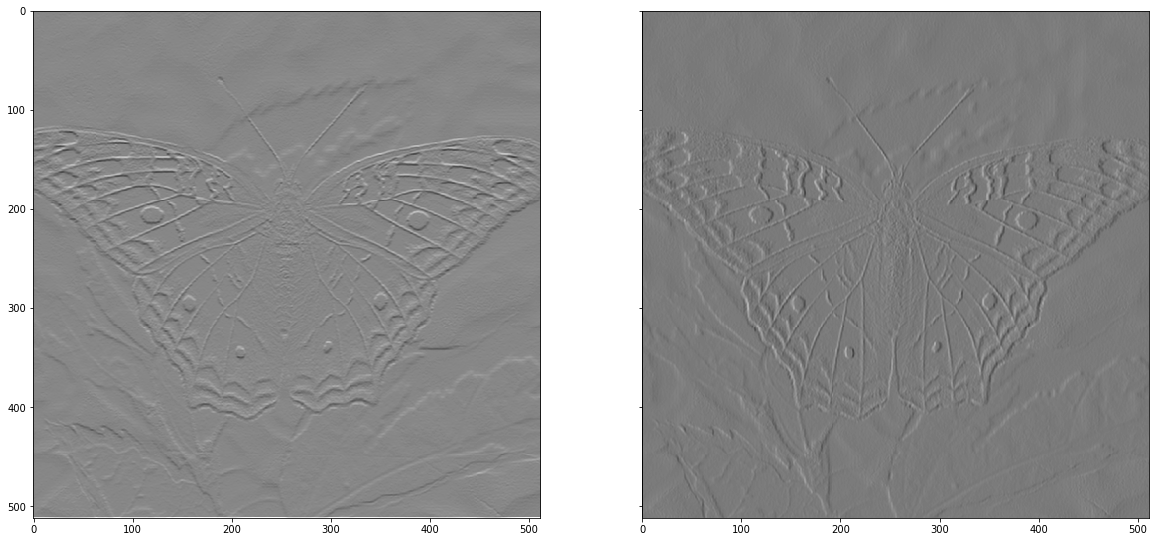

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(20,10))
ax1.imshow(Dx, cmap='gray')
ax2.imshow(Dy, cmap='gray')
plt.show()

In [37]:
def normalize(image, min_=0, max_=1):
    i_max = np.max(image)
    i_min = np.min(image)
    
    X_std = (image - i_min) / (i_max - i_min)
    return X_std * (max_ - min_) + min_

In [38]:
from scipy.ndimage import convolve, binary_erosion, generate_binary_structure


0.0 468.4122116256151


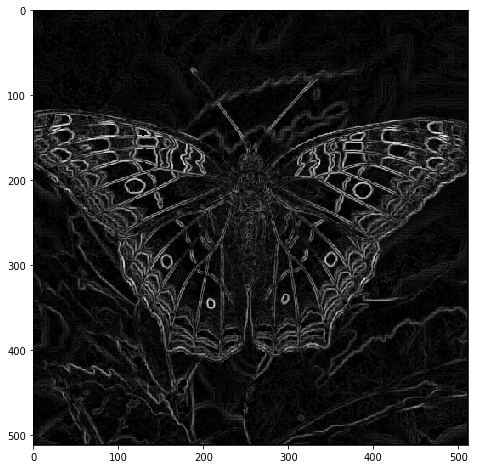

In [41]:
magnitude = np.sqrt(np.square(Dx) + np.square(Dy))

EROSION_SELEM = generate_binary_structure(2, 2)
mask = binary_erosion(magnitude, EROSION_SELEM, border_value=0)
magnitude = magnitude * mask

# print(magnitude.shape)
print(np.min(magnitude), np.max(magnitude))
plt.figure(figsize = (20,8))
plt.imshow(magnitude.astype(int),cmap='gray')
plt.show()

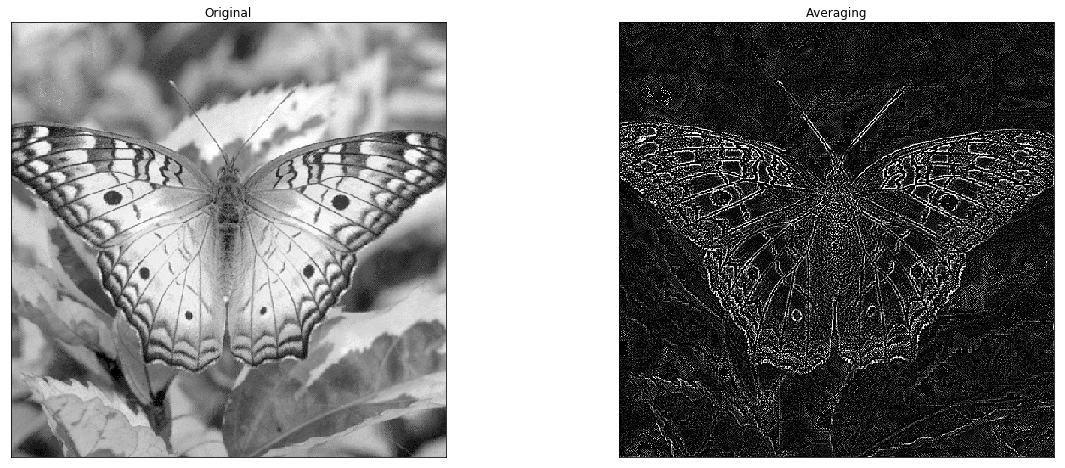

In [16]:
img =butterfly

kernel = np.array([[0, 0, -1, 0, 0],
                   [0, -1, -2, -1, 0],
                   [-1, -2, 16, -2, -1],
                   [0, -1, -2, -1, 0],
                   [0, 0, -1, 0, 0]])

dst = cv2.filter2D(img,ddepth=cv2.CV_8U,kernel=kernel)

plt.figure(figsize = (20,8))
plt.subplot(121),plt.imshow(img,cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst,cmap='gray'),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

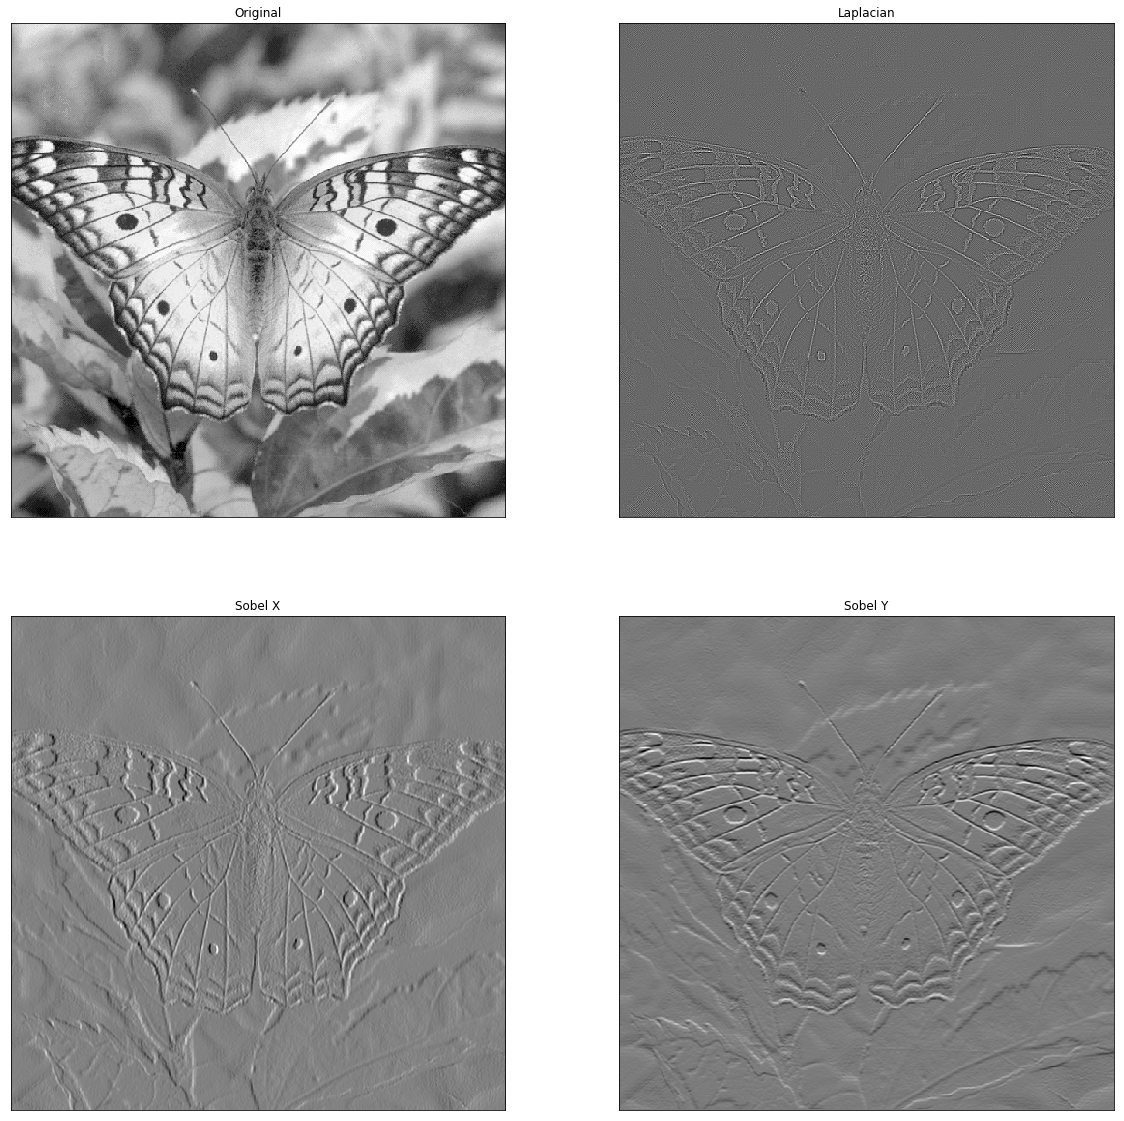

In [17]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = butterfly

laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)

plt.figure(figsize=(20,20))
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

(512, 512)
0.0 468.4122116256151


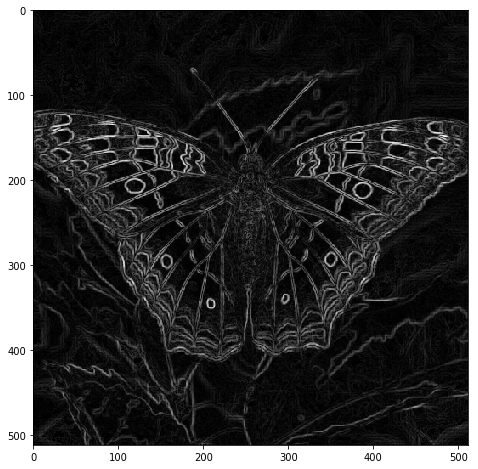

In [18]:
magnitude = np.sqrt(sobelx**2 + sobely**2)
print(magnitude.shape)
print(np.min(magnitude), np.max(magnitude))
plt.figure(figsize = (20,8))
plt.imshow(magnitude,cmap='gray')
plt.show()

0.3247229914030006


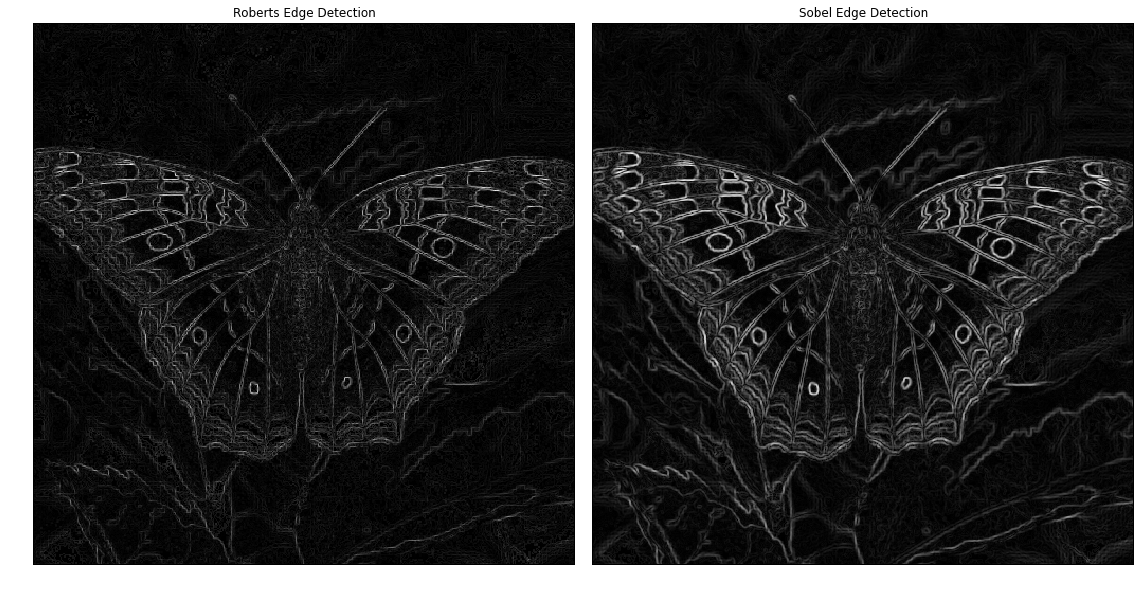

In [19]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.data import camera
from skimage.filters import roberts, sobel, scharr, prewitt


image = butterfly
edge_roberts = roberts(image)
edge_sobel = sobel(image)
print(np.max(edge_sobel))
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(16, 8))

ax[0].imshow(edge_roberts, cmap=plt.cm.gray)
ax[0].set_title('Roberts Edge Detection')

ax[1].imshow(edge_sobel, cmap=plt.cm.gray)
ax[1].set_title('Sobel Edge Detection')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

In [20]:
from skimage.filters import sobel_h, sobel, sobel_v, prewitt

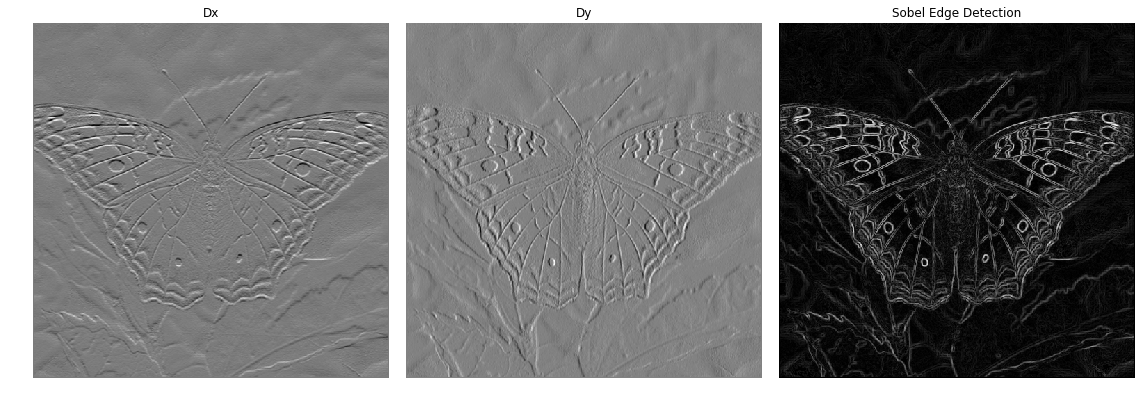

In [21]:
image = butterfly

Dx = sobel_h(image)
Dy = sobel_v(image)
edge_sobel = np.sqrt(Dx**2 + Dy**2)

fig, ax = plt.subplots(ncols=3, sharex=True, sharey=True,
                       figsize=(16, 8))

ax[0].imshow(Dx, cmap=plt.cm.gray)
ax[0].set_title('Dx')

ax[1].imshow(Dy, cmap=plt.cm.gray)
ax[1].set_title('Dy')

ax[2].imshow(edge_sobel, cmap=plt.cm.gray)
ax[2].set_title('Sobel Edge Detection')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()